In [74]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#load the dataset
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

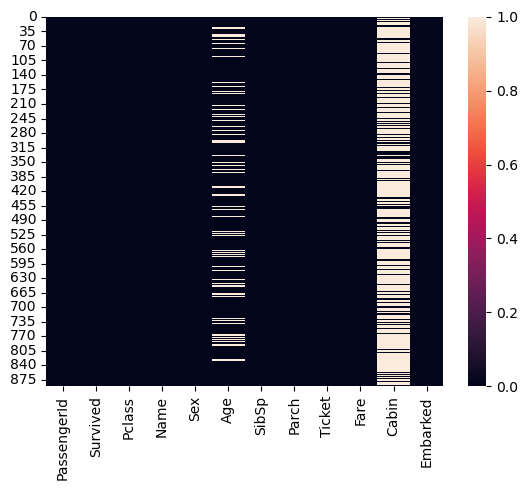

In [9]:
sns.heatmap(df.isnull())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23036\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

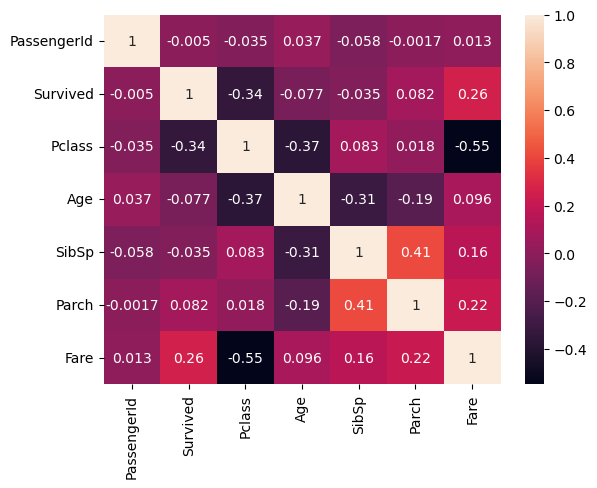

In [10]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Pclass', ylabel='Age'>

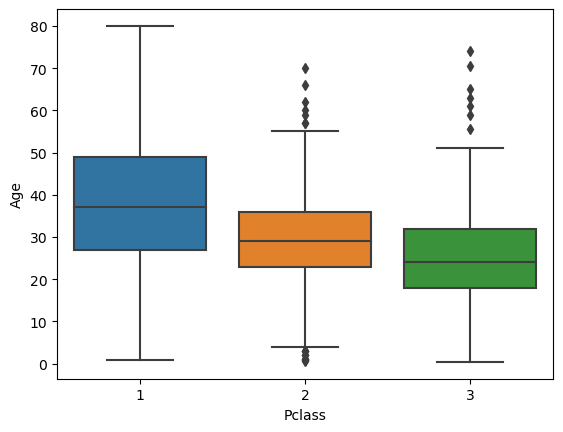

In [11]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [76]:
df.drop(['PassengerId','SibSp','Fare','Cabin'],axis=1,inplace=True)

In [77]:
df.drop(['Name'],axis=1,inplace=True)

In [78]:
df.drop(['Ticket'],axis=1,inplace=True)

In [15]:
df

,Survived,Pclass,Sex,Age,Parch,Embarked
0,0,3,male,22.0,0,S
1,1,1,female,38.0,0,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,0,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,NaN,2,S
889,1,1,male,26.0,0,C


## Explore the data(EDA)

In [57]:
d1 = df['Survived'].value_counts()

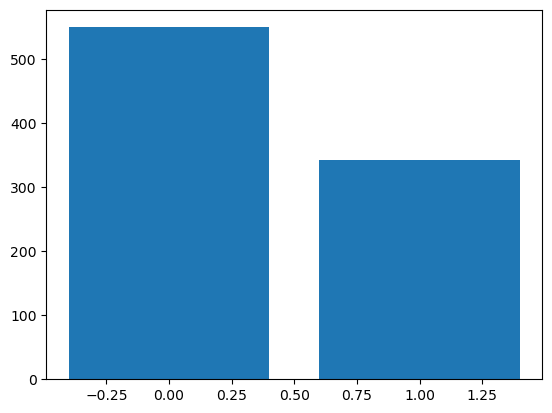

In [17]:
plt.bar(d1.index,d1.values)
plt.show()

In [18]:
(d1.values[0]/(d1.values[0]+d1.values[1]))*100
#we got to know around 61 percent of the data is not survived
#if you decide to split your data into 70:30 ratio
#but is there any chance that in 70% of training data you will have 61% of data not surived and 9 % of the data for survived

61.61616161616161

In [19]:
p1 = df['Pclass'].value_counts()

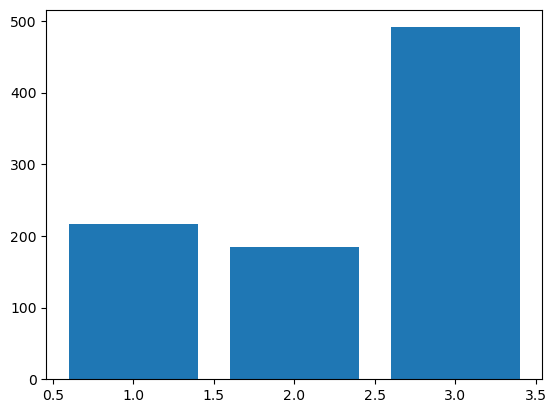

In [20]:
plt.bar(p1.index,p1.values)
plt.show()

In [21]:
s1 = df['Sex'].value_counts()

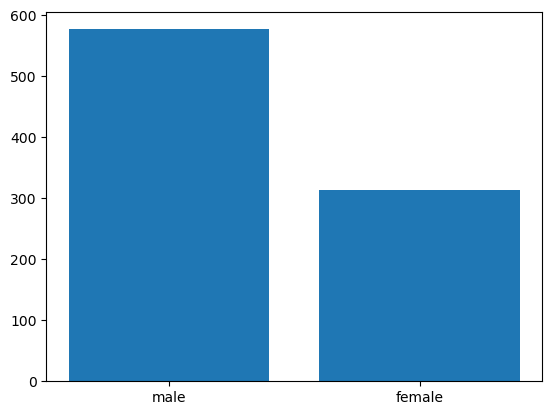

In [22]:
plt.bar(s1.index,s1.values)
plt.show()

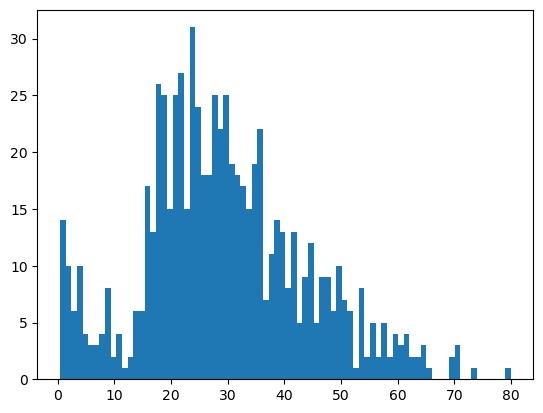

In [26]:
plt.hist(x=df['Age'],bins=80)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

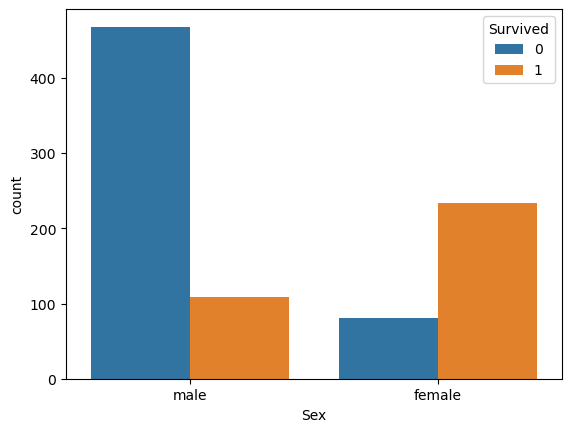

In [27]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

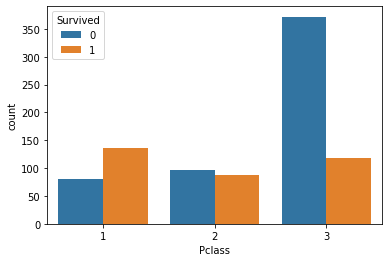

In [130]:
sns.countplot(df['Pclass'],hue=df['Survived'])

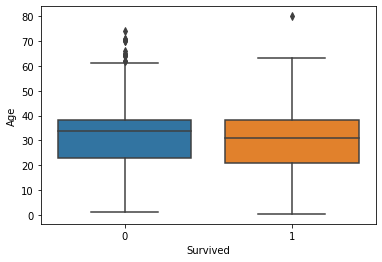

In [133]:
sns.boxplot(x='Survived',y='Age',data=df)

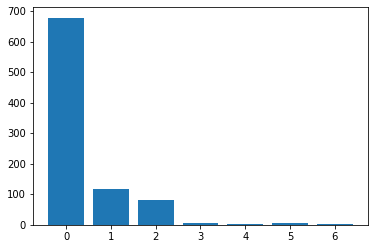

In [137]:
plt.bar(df['Parch'].value_counts().index,df['Parch'].value_counts().values)
plt.show()

In [24]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
#q1, a2,q3, iqr = q3-q1, value<q1-1.5*IQR or value>q3+1.5*IOR

In [56]:
#we already know that there are missing values in the age column

In [29]:
df['Age'].skew()
#+ver skew mean data is right skewed , then we consider median 

0.38910778230082704

In [30]:
df['Age'].median()

28.0

In [79]:
data_f = df.groupby('Pclass')['Age'].mean()

In [80]:
data_f

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [81]:
df['Age'].isnull().sum()

177

In [82]:
data_f.values[0]

38.233440860215055

In [83]:
df.loc[df['Pclass']==1,'Age']=df.loc[df['Pclass']==1,'Age'].fillna(data_f.values[0])
df.loc[df['Pclass']==2,'Age']=df.loc[df['Pclass']==2,'Age'].fillna(data_f.values[1])
df.loc[df['Pclass']==3,'Age']=df.loc[df['Pclass']==3,'Age'].fillna(data_f.values[2])

In [84]:
df['Age'].isnull().sum()

0

In [66]:
#categorical encoding
df

,Survived,Pclass,Sex,Age,Parch,Embarked
0,0,3,male,22.00000,0,S
1,1,1,female,38.00000,0,C
2,1,3,female,26.00000,0,S
3,1,1,female,35.00000,0,S
4,0,3,male,35.00000,0,S
...,...,...,...,...,...,...
886,0,2,male,27.00000,0,S
887,1,1,female,19.00000,0,S
888,0,3,female,25.14062,2,S
889,1,1,male,26.00000,0,C


In [85]:
#categorical encoding
final_data = pd.get_dummies(df,drop_first=True)
final_data

,Survived,Pclass,Age,Parch,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.00000,0,1,0,1
1,1,1,38.00000,0,0,0,0
2,1,3,26.00000,0,0,0,1
3,1,1,35.00000,0,0,0,1
4,0,3,35.00000,0,1,0,1
...,...,...,...,...,...,...,...
886,0,2,27.00000,0,1,0,1
887,1,1,19.00000,0,0,0,1
888,0,3,25.14062,2,0,0,1
889,1,1,26.00000,0,1,0,0


In [86]:
#dependent data and independent data
Y = final_data.iloc[:,0]
X= final_data.iloc[:,1:]
X

,Pclass,Age,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.00000,0,1,0,1
1,1,38.00000,0,0,0,0
2,3,26.00000,0,0,0,1
3,1,35.00000,0,0,0,1
4,3,35.00000,0,1,0,1
...,...,...,...,...,...,...
886,2,27.00000,0,1,0,1
887,1,19.00000,0,0,0,1
888,3,25.14062,2,0,0,1
889,1,26.00000,0,1,0,0


In [87]:
#standard scaler
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_new= st.fit_transform(X)

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3)

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [90]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1], dtype=int64)

In [91]:
#confusion matrix and classification
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[132,  26],
       [ 30,  80]], dtype=int64)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       158
           1       0.75      0.73      0.74       110

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=10).mean()

0.794521249359959

In [94]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_test,Y_test,cv=10).mean()

0.7991452991452992

In [ ]:
#data processing on testing data

In [95]:
df2 = pd.read_csv('titanic_test.csv')

In [96]:
df2.drop(['PassengerId','Name','SibSp','Ticket','Fare','Cabin'],inplace=True,axis=1)

In [97]:
age_d = df2.groupby('Pclass')['Age'].mean()
age_d

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [98]:
df2.loc[df2['Pclass']==1,'Age'] = df2.loc[df2['Pclass']==1,'Age'].fillna(age_d.values[0])
df2.loc[df2['Pclass']==2,'Age'] = df2.loc[df2['Pclass']==2,'Age'].fillna(age_d.values[1])
df2.loc[df2['Pclass']==3,'Age'] = df2.loc[df2['Pclass']==3,'Age'].fillna(age_d.values[2])

In [99]:
df2_new= pd.get_dummies(df2,drop_first=True)

In [100]:
df2_final= st.fit_transform(df2_new)

In [176]:
df2_final

array([[ 0.87348191,  0.39320118, -0.4002477 ,  0.75592895,  2.84375747,
        -1.35067551],
       [ 0.87348191,  1.35849848, -0.4002477 , -1.32287566, -0.35164743,
         0.74037028],
       [-0.31581919,  2.51685524, -0.4002477 ,  0.75592895,  2.84375747,
        -1.35067551],
       ...,
       [ 0.87348191,  0.70209632, -0.4002477 ,  0.75592895, -0.35164743,
         0.74037028],
       [ 0.87348191, -0.41549052, -0.4002477 ,  0.75592895, -0.35164743,
         0.74037028],
       [ 0.87348191, -0.41549052,  0.61989583,  0.75592895, -0.35164743,
        -1.35067551]])

In [101]:
prediction = lr.predict(df2_final)

In [102]:
data = pd.DataFrame(prediction,columns=['result'])
data.to_csv('output.csv',index=False)

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64